## Data Exploration

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')


# Perform basic summary of the dataset
summary = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicates
duplicates = data.duplicated().sum()

# Identifying categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# Check for anomalies by identifying columns with extreme values (outliers)
anomalies = data[numerical_features].apply(lambda x: (x < x.quantile(0.01)) | (x > x.quantile(0.99))).sum()

# Display results
summary, missing_values, duplicates, categorical_features, numerical_features, anomalies


(                   id   brand      model     model_year         milage  \
 count   188533.000000  188533     188533  188533.000000  188533.000000   
 unique            NaN      57       1897            NaN            NaN   
 top               NaN    Ford  F-150 XLT            NaN            NaN   
 freq              NaN   23088       2945            NaN            NaN   
 mean     94266.000000     NaN        NaN    2015.829998   65705.295174   
 std      54424.933488     NaN        NaN       5.660967   49798.158076   
 min          0.000000     NaN        NaN    1974.000000     100.000000   
 25%      47133.000000     NaN        NaN    2013.000000   24115.000000   
 50%      94266.000000     NaN        NaN    2017.000000   57785.000000   
 75%     141399.000000     NaN        NaN    2020.000000   95400.000000   
 max     188532.000000     NaN        NaN    2024.000000  405000.000000   
 
        fuel_type                                        engine transmission  \
 count     183450 

In [ ]:
data.head()

In [ ]:
test_data.head()

### Initial Findings

Numerical:
- id: 188,533 total
- model_year ranges 1974-2024 with average model being 2015-2016
- mileage ranges 100-405,000 with average of 65,705.3 miles
- price ranges from $2,000 to $2,954,083 with average of $43,878 

Categorical:
- brand
- model
- fuel_type
- engine
- transmission
- ext_col (exterior color)
- int_col (interior color)
- accident
- clean_title

Missing Values: 
- fuel type: 5,083
- accident: 2,452 
- clean_title: 21,419 

Other:
- no duplicates
- look into potential outliers for: model_year, milage, price

## Data Visualization

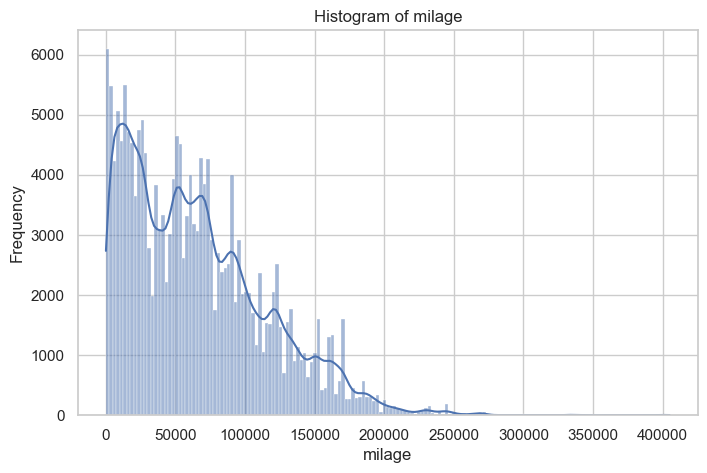

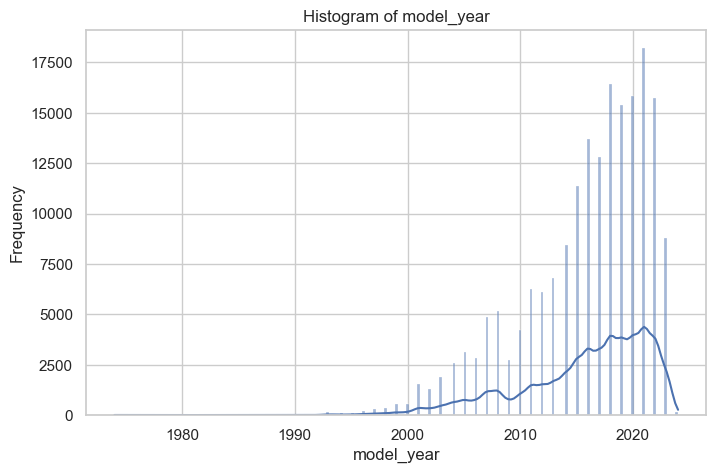

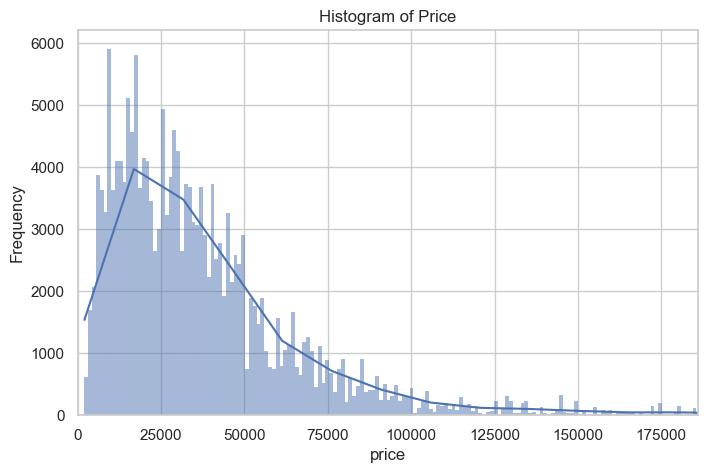

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for seaborn
sns.set(style="whitegrid")

# 1. Univariate analysis: Histograms for continuous variables (including price)
numerical_features = ['milage','model_year']

# Plot individual histograms for continuous variables
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# plotting price separately to make the distribution more visible
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], kde=True)
plt.xlim(0, data['price'].quantile(0.98))  # Zoom in on 98th percentile of the price range
plt.title('Histogram of Price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()



- milage: right skewed
- model_year: left skewed
- price: right skewed

In [ ]:
# 2. Correlation matrix for numerical variables
numerical_features = ['milage','model_year', 'price']
correlation_matrix = data[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

- Model Year vs Milage
    - strong negative correlation suggests newer vehicles have lower milage- intuitive
- Milage vs Price
    - moderate negative correlation suggests cars with higher mileage are associated with lower prices as expected
- Model Year vs Price
    - weak to moderate correlation suggests newer vehicles tend to have higher price. Not a strong relationship because price is influenced by many other factors.

In [ ]:
# 3. Visualizing outliers with box plots for continuous variables

# Visualizing outliers with vertical box plots for continuous variables
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=data[feature])  # Changing to vertical orientation
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

# price is separated to zoom in on the 95th percentile
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['price'])
plt.ylim(0, data['price'].quantile(0.95))  # Zoom in to the 95th percentile of price to remove extreme outliers
plt.title('Zoomed Boxplot of Price')
plt.ylabel('price')
plt.show()


- model_year:
    - narrow interquartile range indicates that the middle 50% if vehicles are concentrated within a small range of years ~2010-2020
    - number of older vehicles appear to be outliers extending from the early 2000s to the 1970s
    - oldest car sold in 1973ish
    
- mileage:
    - IQR lies between approximately 20,000 to 100,000 miles, which suggests that most vehicles in this dataset have mileage within this range.
    - considerable number of high-mileage outliers, with some vehicles having up to 400,000 miles.

- price:
    - IQR shows that the middle 50% of vehicle prices fall between approximately $18,000 and $50,000
    - outliers are vehicles more expensive than $100k
    - most expensive cars sold for around $3 million, some for $2 and $1.6 million and then a decent spread of outliers sold from $100k to $750k

In [ ]:
# Visualizing the distribution of categorical variables using bar plots

# brands
plt.figure(figsize=(10, 6))
data['brand'].value_counts().nlargest(25).plot(kind='bar', color='skyblue')
plt.title(f'Categories of brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# models
plt.figure(figsize=(10, 6))
data['model'].value_counts().nlargest(35).plot(kind='bar', color='skyblue')
plt.title(f'Categories of model')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# fuel type
plt.figure(figsize=(10, 6))
fuel_type_counts = data['fuel_type'].value_counts(normalize=True) * 100  # Get percentages
ax = fuel_type_counts.plot(kind='bar', color='skyblue')

# Annotating percentages on top of the bars
for i, percentage in enumerate(fuel_type_counts):
    ax.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Categories of fuel_type with Percentages')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# engine
plt.figure(figsize=(10, 6))
data['engine'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of engine')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# transmission
plt.figure(figsize=(10, 6))
data['transmission'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of transmission')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# exterior and interior colors
colors = ['ext_col', 'int_col']

for feature in colors:
    plt.figure(figsize=(10, 6))
    data[feature].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Categories of {feature}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
# accident
plt.figure(figsize=(10, 6))
data['accident'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of accident')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# clean title
plt.figure(figsize=(10, 6))
data['clean_title'].value_counts().nlargest(5).plot(kind='bar', color='skyblue')
plt.title(f'Categories of clean_title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### Key Observations

- Brand: 
    - The distribution shows that certain brands dominate the dataset, with Ford being the most frequent.
- Model: 
    - Among models, the Ford F-150 XLT stands out as the most frequent, followed by a variety of other models.
- Fuel Type: 
    - Gasoline is by far the most common fuel type, with other fuel types much less frequent.
- Engine: 
    - Certain engine configurations appear more frequently, though there is a wide variety overall.
- Transmission: 
    - The A/T transmission (Automatic) is dominant, with very few alternatives.
- Exterior Color: 
    - Black is the most common exterior color, followed by a few other popular colors like White and Silver.
- Interior Color: 
    - Black also leads among interior colors, with a large gap to the next most common colors.
- Accident: 
    - Most vehicles have "None reported" for accidents, indicating clean histories for the majority.
- Clean title:
    - all records are either clean title or missing

## Data Preprocessing

In [16]:
preprocessed_data = data.copy()

#### Dropping Unnecessary Features

In [17]:
# dropping id
preprocessed_data = preprocessed_data.drop(columns=['id'])

#### Handling Missing Values

In [18]:
# Handling missing values for 'accident' 
preprocessed_data['accident'].fillna('None reported', inplace=True)

# Impute missing values in clean_title with 'Unknown'
preprocessed_data['clean_title'].fillna('Unknown', inplace=True)

# For 'fuel_type', given that 90%+ of the values are 'Gasoline', we'll fill the missing values with 'Gasoline'
# This simplifies the process without likely affecting model accuracy significantly
preprocessed_data['fuel_type'].fillna('Gasoline', inplace=True)

# Confirm the missing values have been handled
missing_values_after_fill = preprocessed_data.isnull().sum()

missing_values_after_fill


brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [19]:
preprocessed_data.shape

(188533, 12)

#### Encoding Categorical Variables

In [20]:
# Performing One-Hot Encoding (OHE) on the categorical variables
categorical_features_to_encode = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# Perform one-hot encoding on the selected categorical variables
data_encoded = pd.get_dummies(preprocessed_data, columns=categorical_features_to_encode, drop_first=True)

In [14]:
data_encoded.shape

(188533, 593)

In [21]:
# Handling model and engine categorical variables

from sklearn.model_selection import KFold
import numpy as np

# Make copies of the original data so we don't modify them directly
train = data_encoded.copy()
test = test_data.copy()  

# Define the columns to target encode
target_encode_columns = ['model', 'engine']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty DataFrame to store the new target-encoded values
train_encoded = pd.DataFrame(index=train.index)
test_encoded = pd.DataFrame(index=test.index)

# Iterate over each column that needs target encoding
for col in target_encode_columns:
    
    # Create a column to store the encoded values in the training set
    train_encoded[col] = np.nan
    
    # Iterate over each fold
    for train_idx, valid_idx in kf.split(train):
        # Split the data into training and validation folds
        train_fold, valid_fold = train.iloc[train_idx], train.iloc[valid_idx]
        
        # Calculate the mean target value for each category in the training fold
        category_means = train_fold.groupby(col)['price'].mean()
        
        # Replace the categories in the validation fold with the mean target values
        train_encoded.loc[valid_idx, col] = train.loc[valid_idx, col].map(category_means)
    
    # Global mean for this column, to be used for test set and unseen categories
    global_mean = train.groupby(col)['price'].mean()
    
    # Apply global mean to test data and handle unseen categories
    test_encoded[col] = test[col].map(global_mean).fillna(train['price'].mean())

# After the loop, `train_encoded` and `test_encoded` will have the target-encoded values for `model` and `engine`.


- K-Fold Cross-Validation: Split the training data into 5 folds (KFold with 5 splits). For each fold, we calculate the mean price for the categories based on the k-1 folds and use that to encode the left-out fold.

- Target Encoding: For each categorical column (model and engine), we replace the values in the validation fold with the mean prices from the k-1 training folds.

- Global Mean for Test Set: After encoding the training data, we calculate the global mean price for each category in the entire training set and use these means to encode the test data. Unseen categories in the test set are filled with the overall mean price.

In [22]:
train_encoded.head()

,model,engine
0,12550.511828,11334.659420
1,13879.500000,12452.181818
2,22720.920000,18631.602254
3,48190.662500,42783.955128
4,67135.791667,38459.296296


In [23]:
# Replace the 'model' and 'engine' columns in data_encoded with target-encoded values
data_encoded['model'] = train_encoded['model']
data_encoded['engine'] = train_encoded['engine']

data_encoded.head()

,model,model_year,milage,engine,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,...,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported,clean_title_Yes
0,12550.511828,2007,213000,11334.659420,4200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,13879.500000,2002,143250,12452.181818,4999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,22720.920000,2002,136731,18631.602254,13900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,48190.662500,2017,19500,42783.955128,45000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,67135.791667,2021,7388,38459.296296,97500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


#### Handling Outliers

In [24]:
no_outlier_data = data_encoded.copy()
no_outlier_data.shape

(188533, 593)

In [ ]:
# Find the number of cars with mileage > 200,000
high_mileage_count = data[data['milage'] > 200000].shape[0]

# Find the number of cars with model year older than 2000
old_model_year_count = data[data['model_year'] < 2000].shape[0]

print(f'Number of cars with mileage > 200,000: {high_mileage_count}')
print(f'Number of cars with model year older than 2000: {old_model_year_count}')


In [ ]:
# Capping mileage at 200,000
no_outlier_data['milage'] = no_outlier_data['milage'].apply(lambda x: min(x, 200000))

# Removing cars with model year older than 2000
no_outlier_data = no_outlier_data[no_outlier_data['model_year'] >= 2000]

# Verifying the changes
no_outlier_data.shape


In [ ]:
numerical_features = ['milage','model_year']

# Taking a look at milage and model_year after removing outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(no_outlier_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Scaling 

In [25]:
scaled_log_data = no_outlier_data.copy()
scaled_log_data.shape

(188533, 593)

In [26]:
scaled_log_data.head()

,model,model_year,milage,engine,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,...,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported,clean_title_Yes
0,12550.511828,2007,213000,11334.659420,4200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,13879.500000,2002,143250,12452.181818,4999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,22720.920000,2002,136731,18631.602254,13900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,48190.662500,2017,19500,42783.955128,45000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,67135.791667,2021,7388,38459.296296,97500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [27]:
scaled_log_data['log_price'] = np.log1p(scaled_log_data['price'])
y = scaled_log_data['log_price']

scaled_log_data['log_milage'] = np.log1p(scaled_log_data['milage'])
scaled_log_data['log_model'] = np.log1p(scaled_log_data['model'])
scaled_log_data['log_engine'] = np.log1p(scaled_log_data['engine'])


current_year = 2023
scaled_log_data['vehicle_age'] = current_year - scaled_log_data['model_year']



In [28]:
scaled_log_data.head()

,model,model_year,milage,engine,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,...,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported,clean_title_Yes,log_price,log_milage,log_model,log_engine,vehicle_age
0,12550.511828,2007,213000,11334.659420,4200,0,0,0,0,0,...,0,0,0,1,1,8.343078,12.269052,9.437596,9.335709,16
1,13879.500000,2002,143250,12452.181818,4999,0,0,0,0,0,...,0,0,0,0,1,8.517193,11.872354,9.538240,9.429731,21
2,22720.920000,2002,136731,18631.602254,13900,0,0,0,0,0,...,0,0,0,1,1,9.539716,11.825778,10.031085,9.832668,21
3,48190.662500,2017,19500,42783.955128,45000,0,0,0,0,0,...,0,0,0,1,1,10.714440,9.878221,10.782941,10.663942,6
4,67135.791667,2021,7388,38459.296296,97500,0,0,0,0,0,...,0,0,0,1,1,11.487618,8.907748,11.114487,10.557382,2


In [ ]:
#numerical_features = ['log_price', 'log_milage','vehicle_age']
#numerical_features = ['log_milage','vehicle_age']
encoded_features = ['log_model','log_engine']


# Taking a look at log_milage, vehicle_age after log transformation
for feature in encoded_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(scaled_log_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    

#### Dropping prescaled vars

In [29]:
post_dropped_data = scaled_log_data.copy()
post_dropped_data.shape

(188533, 598)

In [30]:
post_dropped_data.head()

,model,model_year,milage,engine,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,...,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported,clean_title_Yes,log_price,log_milage,log_model,log_engine,vehicle_age
0,12550.511828,2007,213000,11334.659420,4200,0,0,0,0,0,...,0,0,0,1,1,8.343078,12.269052,9.437596,9.335709,16
1,13879.500000,2002,143250,12452.181818,4999,0,0,0,0,0,...,0,0,0,0,1,8.517193,11.872354,9.538240,9.429731,21
2,22720.920000,2002,136731,18631.602254,13900,0,0,0,0,0,...,0,0,0,1,1,9.539716,11.825778,10.031085,9.832668,21
3,48190.662500,2017,19500,42783.955128,45000,0,0,0,0,0,...,0,0,0,1,1,10.714440,9.878221,10.782941,10.663942,6
4,67135.791667,2021,7388,38459.296296,97500,0,0,0,0,0,...,0,0,0,1,1,11.487618,8.907748,11.114487,10.557382,2


In [31]:
post_dropped_data = post_dropped_data.drop(columns=['milage', 'model_year', 'model', 'engine'])
post_dropped_data.shape

(188533, 594)

In [32]:
preprocessed_train_data = post_dropped_data.copy()
preprocessed_train_data.shape

(188533, 594)

#### Applying Same Transformations to Test Data

In [33]:
test_data_processed = test_data.copy()
test_data_processed.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [34]:
# dropping id
test_data_processed = test_data_processed.drop(columns=['id'])

In [35]:
# Handling missing values for 'accident' 
test_data_processed['accident'].fillna('None reported', inplace=True)

# Impute missing values in clean_title with 'Unknown'
test_data_processed['clean_title'].fillna('Unknown', inplace=True)

# For 'fuel_type', given that 90%+ of the values are 'Gasoline', we'll fill the missing values with 'Gasoline'
# This simplifies the process without likely affecting model accuracy significantly
test_data_processed['fuel_type'].fillna('Gasoline', inplace=True)

# Confirm the missing values have been handled
missing_values_after_fill = test_data_processed.isnull().sum()

missing_values_after_fill

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [36]:
test_data_processed.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,Unknown
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,Unknown
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [37]:
# Performing One-Hot Encoding (OHE) on the categorical variables
categorical_features_to_encode = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# Perform one-hot encoding on the selected categorical variables
test_data_encoded = pd.get_dummies(test_data_processed, columns=categorical_features_to_encode, drop_first=True)

In [38]:
test_data_encoded.shape

(125690, 588)

In [ ]:
test_data_encoded.head()

In [45]:
# Capping mileage at 200,000 for test_data
test_data_encoded['milage'] = test_data_encoded['milage'].apply(lambda x: min(x, 200000))




test_data_encoded[['milage', 'model_year']] = scaler.fit_transform(test_data_encoded[['milage', 'model_year']])

In [84]:
test_data_encoded['log_milage'] = np.log1p(test_data_encoded['milage'])
test_data_encoded['log_model'] = np.log1p(test_data_encoded['model'])
test_data_encoded['log_engine'] = np.log1p(test_data_encoded['engine'])


current_year = 2023
test_data_encoded['vehicle_age'] = current_year - test_data_encoded['model_year']

In [ ]:
testing = ['log_milage','log_engine']

for feature in testing:
    plt.figure(figsize=(8, 5))
    sns.histplot(test_data_encoded[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
test_data_encoded.head()

In [ ]:
test_data_encoded = test_data_encoded.drop(columns=['id','milage', 'model_year', 'model', 'engine'])
test_data_encoded.shape

In [ ]:
# Find unique features in X_train not in test_data_encoded
unique_to_X_train = set(X_train.columns) - set(test_data_encoded.columns)

# Find unique features in test_data_encoded not in X_train
unique_to_test_data_encoded = set(test_data_encoded.columns) - set(X_train.columns)

# Combine unique features from both sets
unique_features = unique_to_X_train.union(unique_to_test_data_encoded)

print(unique_features)


In [ ]:
preprocessed_test_data = test_data_encoded.copy()
preprocessed_test_data.head()

#### Splitting Preprocessed Train Data

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
#X = preprocessed_train_data.drop(columns=['price'])
X = preprocessed_train_data.drop(columns=['price','log_price'])    
#y = preprocessed_train_data['price']
y = preprocessed_train_data['log_price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f'Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}')


In [ ]:
X_train.head()

In [ ]:
# Check for missing values in X_train
missing_values_train = X_train.isnull().sum()
print("Missing values in X_train:")
print(missing_values_train[missing_values_train > 0])

# Check for missing values in X_val
missing_values_val = X_val.isnull().sum()
print("Missing values in X_val:")
print(missing_values_val[missing_values_val > 0])


In [42]:
# Impute missing values in 'model' and 'engine' with the global mean price from training data
X_train['log_model'].fillna(preprocessed_train_data['log_price'].mean(), inplace=True)
X_train['log_engine'].fillna(preprocessed_train_data['log_price'].mean(), inplace=True)

X_val['log_model'].fillna(preprocessed_train_data['log_price'].mean(), inplace=True)
X_val['log_engine'].fillna(preprocessed_train_data['log_price'].mean(), inplace=True)


## Feature Selection

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test_scaled = scaler.transform(X_val)  # Only transform the test set

pca = PCA(n_components=0.95)  # Retain 95% of variance or select the number of components
X_train_pca = pca.fit_transform(X_train_scaled)


In [ ]:
import matplotlib.pyplot as plt

# Explained Variance Plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
# Function to create a biplot
def biplot(X, pca, labels):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
    
    # Plot arrows for each feature
    feature_vectors = pca.components_.T
    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, v[0], v[1], color='r', head_width=0.05)
        plt.text(v[0], v[1], labels[i], color='black', ha='center', va='center')
    
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.show()

# Use the feature names from your original data for labeling
feature_names = X.columns

# Visualize the biplot
biplot(X_train_pca, pca, feature_names)



Top 10 Most Important Feautes (without removing anything)

                                           
- 3                                         milage    0.199385
- 4                                         engine    0.138879
- 0                                             id    0.123912
- 1                                          model    0.091330
- 2                                     model_year    0.064733
- 421                                ext_col_White    0.017590
- 146                                ext_col_Black    0.013863
- 155                                 ext_col_Blue    0.011823
- 89                      transmission_7-Speed A/T    0.010826
- 591                       accident_None reported    0.009978
- 115  transmission_Transmission w/Dual Shift Mode    0.009694
- 245                                 ext_col_Gray    0.009674
- 86                      transmission_6-Speed M/T    0.008134
- 445                                int_col_Beige    0.008113
- 449                                int_col_Black    0.007947
- 380                               ext_col_Silver    0.007655
- 13                               brand_Chevrolet    0.007536
- 97                      transmission_8-Speed A/T    0.007164
- 98                transmission_8-Speed Automatic    0.007044
- 82                      transmission_6-Speed A/T    0.007003

In [39]:
# Dropping the less important features
#top_features = ['milage', 'engine', 'model', 'model_year', 'accident_None reported']

# Update X_train and X_val with the selected features
#X_train_selected = X_train[top_features]
#X_val_selected = X_val[top_features]

## Modeling

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Basic LR model

# Initialize 
lr_model = LinearRegression()

# Train 
lr_model.fit(X_train, y_train)
#lr_model.fit(X_train_selected, y_train)


# Make predictions on the validation set
lr_preds = lr_model.predict(X_val)


# Calculate RMSE 
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_preds))

# Print the RMSE 
print(f"Linear Regression RMSE: {lr_rmse}")

In [ ]:
# log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Basic LR model

# Initialize 
lr_model = LinearRegression()

# Train 
lr_model.fit(X_train, y_train)
#lr_model.fit(X_train_selected, y_train)


# Make predictions on the validation set (in log scale)
log_preds = lr_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds = np.exp(log_preds)

# Calculate RMSE using the original target values (not log-transformed)
rmse_original_scale = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds))  

# Print the RMSE in the original price scale
print(f"RMSE in original price scale: {rmse_original_scale}")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on the training data, only transform the validation/test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Use scaled data to train your model
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set (in log scale)
log_preds = lr_model.predict(X_val_scaled)

# Exponentiate the predictions to convert back to the original scale
exp_preds = np.exp(log_preds)

# Calculate RMSE using the original target values (not log-transformed)
rmse_original_scale = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds))  

# Print the RMSE in the original price scale
print(f"RMSE in original price scale: {rmse_original_scale}")


##### Results Tracker

1. Score with 0 feature selection and no hyperparameter tuning: 78966.42329318252
2. Score with top 5 important features: 78913.3492655269
3. Score with 0 feature selection and hyperparameter tuning (Lasso): 78880.96674924002 

#### XGBoost

In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_xgb = xgb_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_xgb = np.exp(log_preds_xgb)

# Calculate RMSE in original price scale
rmse_xgb = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_xgb))

print(f"XGBoost RMSE in original price scale: {rmse_xgb}")


#### Ridge Model

In [ ]:
from sklearn.linear_model import Ridge

# Initialize Ridge model with alpha value (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_ridge = ridge_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_ridge = np.exp(log_preds_ridge)

# Calculate RMSE in original price scale
rmse_ridge = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_ridge))

print(f"Ridge RMSE in original price scale: {rmse_ridge}")


#### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso model with alpha value (regularization strength)
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_lasso = lasso_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_lasso = np.exp(log_preds_lasso)

# Calculate RMSE in original price scale
rmse_lasso = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_lasso))

print(f"Lasso RMSE in original price scale: {rmse_lasso}")


#### ElasticNet Regresson

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet model with alpha and l1_ratio (mix between L1 and L2 regularization)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
elasticnet_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_elasticnet = elasticnet_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_elasticnet = np.exp(log_preds_elasticnet)

# Calculate RMSE in original price scale
rmse_elasticnet = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_elasticnet))

print(f"ElasticNet RMSE in original price scale: {rmse_elasticnet}")


#### Random Forest

In [ ]:
# Basic RF model

from sklearn.ensemble import RandomForestRegressor

# Initialize
rf_model = RandomForestRegressor(random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
rf_preds = rf_model.predict(X_val)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))

# Print the RMSE  
print(f"Random Forest RMSE: {np.exp(rf_rmse)}")

In [61]:
# Initialize Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
rf_params = {
    'n_estimators': [100, 200, 500],            # Number of trees in the forest
    'max_depth': [10, 20, None],                # Maximum depth of each tree
    'min_samples_split': [2, 10, 20],           # Minimum number of samples to split a node
    'min_samples_leaf': [1, 5, 10],             # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider for the best split
}

# Set up GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Train the model with GridSearchCV
rf_grid.fit(X_train, y_train)

# Get the best model from the grid search
rf_best = rf_grid.best_estimator_

# Make predictions on the validation set
rf_preds = rf_best.predict(X_val)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))

# Print the RMSE and the best parameters
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")


##### Results Tracker

1. Score with 0 feature selection and no hyperparameter tuning: 80948.23604112217
2. Score with top 5 important features: 82754.79331684638
3. Score with 0 feature selection and hyperparameter tuning: 

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize
dt_model = DecisionTreeRegressor(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# Make predictions on the validation set
dt_preds = dt_model.predict(X_val)

# Calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_val, dt_preds))

# Print the RMSE
print(f"Decision Tree RMSE: {dt_rmse}")  

##### Results Tracker

1. Score with 0 feature selection and no hyperparameter tuning: 102870.21728554134
2. Score with top 5 important features: 108295.3780680988

## Submission

In [ ]:
import pandas as pd

test_data_clean = preprocessed_test_data.drop(columns=['price'], errors='ignore')

test_preds = lr_model.predict(test_data_clean) 

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'id': test_data_clean['id'],  # The 'id' column from the test data
    'price': test_preds     # The predicted prices from the model
})

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully.")


In [ ]:
test_data_clean.head()

In [ ]:
test_data_encoded['id'] = test_ids

# Now you can run your prediction without issues
test_data_clean = test_data_encoded.drop(columns=['log_price', 'price'], errors='ignore')

# Predict the log of the price
test_preds_log = lr_model.predict(test_data_clean.drop(columns=['id']))  # Drop 'id' for prediction

# Convert the log predictions back to actual prices
test_preds = np.exp(test_preds_log)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'id': test_data_encoded['id'],  # The 'id' column from the test data
    'price': test_preds             # The predicted prices from the model
})

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully.")